# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [2]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [3]:
#Cargamos dataset a utilizar
df = pd.read_csv('/Users/andressanchez/Desktop/Data Scientist/Decision Trees and Random Forests Course with Python and scikit-learn/car_evaluation.csv', header=None)







## Análisis exploratorio de datos

In [4]:
#Visualizacion del dataframe
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
#Analizamos el shape del objeto
df.shape


(1728, 7)

In [6]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names



In [7]:
#Vericamos la transformacion
df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
#Visualizamos los tipos de datos
df.dtypes


buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [9]:
# Exploremos un poco mas la variable target
df['class'].value_counts()


unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [10]:
#Verificamos valores missings
df.isnull().sum()


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Procesamiento de datos

In [11]:
#Separamos en X e y
X = df.drop('class', axis=1)    
y = df['class']


In [12]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split


#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [13]:
#Veamos que obtuvimos
X_train.shape, X_test.shape


((1209, 6), (519, 6))

In [14]:
y_train.shape, y_test.shape

((1209,), (519,))

In [15]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head()


,buying,maint,doors,persons,lug_boot,safety
124,vhigh,high,2,4,big,med
771,high,low,2,4,big,low
470,high,vhigh,3,4,small,high
240,vhigh,med,2,more,big,low
1482,low,high,4,more,big,low


In [16]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

## Entrenamiento de modelo de clasificación con árbol de decisión

In [17]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['persons','safety','lug_boot','doors','maint','buying'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


In [18]:
#Verificamos la transformacion
X_train.head()


,buying,maint,doors,persons,lug_boot,safety
124,1,1,1,1,1,1
771,2,2,1,1,1,2
470,2,3,2,1,2,3
240,1,4,1,2,1,2
1482,3,1,3,2,1,2


In [19]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2) #5k datos depth 3


In [20]:
#Entrenamiento
tree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=2)

In [21]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test) 


In [22]:
y_train_pred_tree

array(['unacc', 'unacc', 'acc', ..., 'acc', 'acc', 'unacc'], dtype=object)

## Evaluación de modelo de clasificación con árbol de decisión

In [23]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score



#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)


#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('Accuracy en Train:', train_accuracy_tree)
print('Accuracy en Test:', test_accuracy_tree)


#F1 Score
from sklearn.metrics import f1_score

#Calculo el f1 en Train
train_f1_tree = f1_score(y_train, y_train_pred_tree, average='micro')


#Calculo el f1 en Test
test_f1_tree = f1_score(y_test, y_test_pred_tree, average='micro')

print('F1 en Train:', train_f1_tree)
print('F1 en Test:', test_f1_tree)

Accuracy en Train: 0.7799834574028123
Accuracy en Test: 0.74373795761079
F1 en Train: 0.7799834574028124
F1 en Test: 0.74373795761079


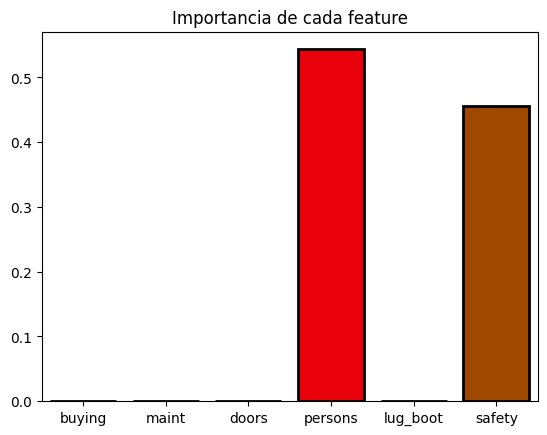

In [24]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)
sns.barplot(data,
            palette = 'bright',
            saturation = 2.0,
            edgecolor = 'black',
            linewidth = 2)
plt.title('Importancia de cada feature')
plt.show()


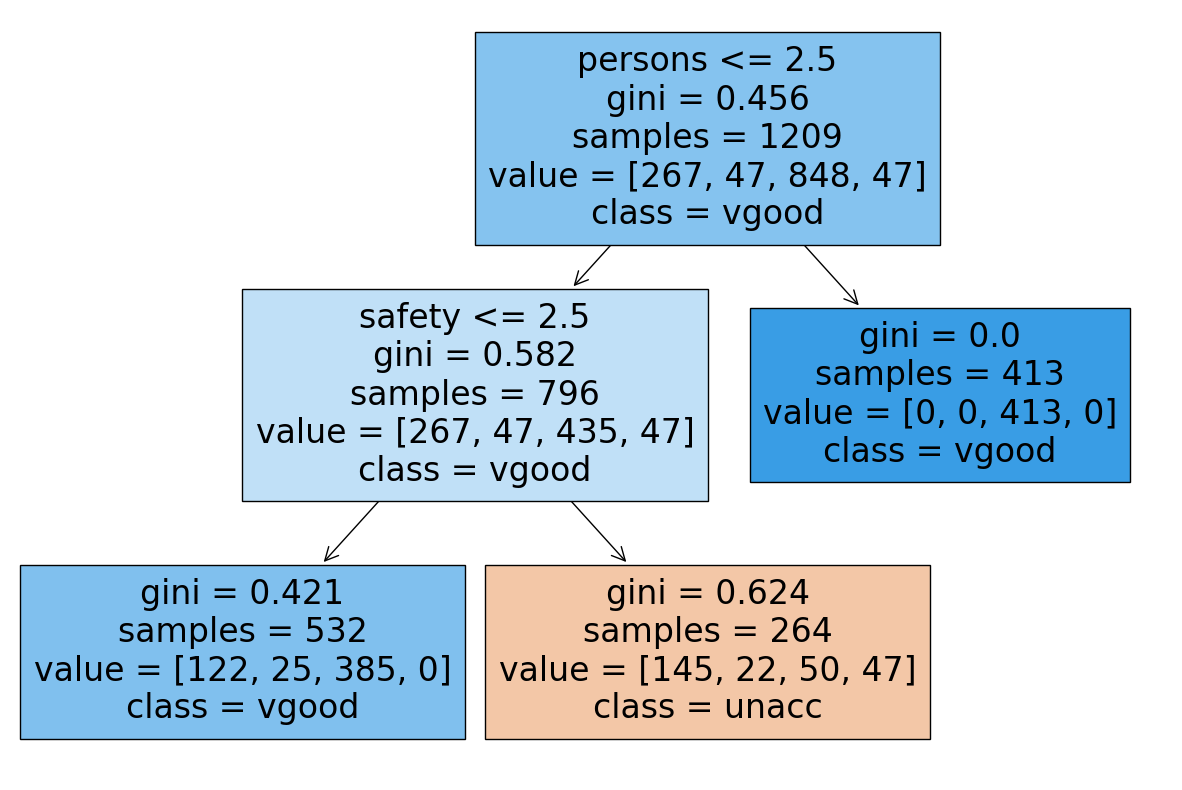

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Suponiendo que ya has entrenado tu modelo de árbol de decisión y lo has almacenado en una variable llamada 'decision_tree_model'
# Por ejemplo:
# from sklearn.tree import DecisionTreeClassifier
# decision_tree_model = DecisionTreeClassifier()
# decision_tree_model.fit(X, y)

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura según tus preferencias
plot_tree(tree, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()


## Entrenamiento de modelo de clasificación con random forest

In [26]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,random_state=42) # Dataset pequeño 10 estimators
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

In [27]:
#Calculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)


## Evaluación de modelo de clasificación con random forest

In [28]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score


#Calculo el accuracy en Train
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

#Calculo el accuracy en Test
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print('Accuracy en Train:', train_accuracy_rf)
print('Accuracy en Test:', test_accuracy_rf)

#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

Accuracy en Train: 0.9966914805624483
Accuracy en Test: 0.9075144508670521


In [33]:
# Visualizacion de las feature importantes
features_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
features_scores



safety      0.278626
persons     0.230528
maint       0.195787
buying      0.145649
doors       0.079066
lug_boot    0.070345
dtype: float64

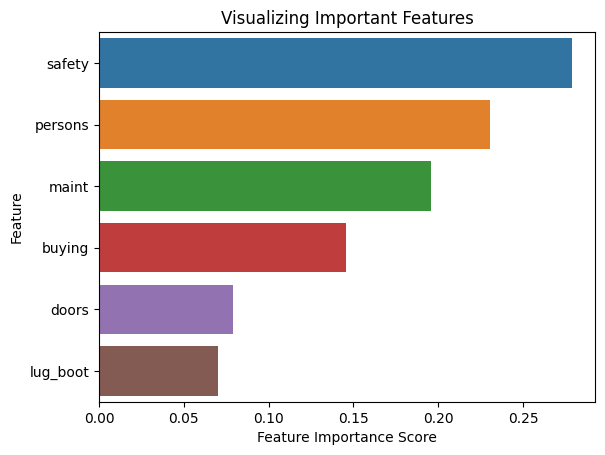

In [34]:
#Grafico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=features_scores, y=features_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title("Visualizing Important Features")
plt.show()



Matriz de confusion del RF: 
 [[105   3   8   1]
 [ 14   8   0   0]
 [ 18   0 344   0]
 [  2   2   0  14]]


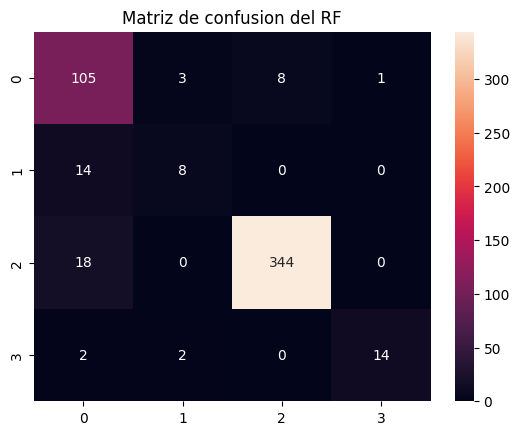

In [36]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)

print('Matriz de confusion del RF: \n', cm)

# Heatmap de la cm

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de confusion del RF')
plt.show()


In [37]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_rf))


              precision    recall  f1-score   support

         acc       0.76      0.90      0.82       117
        good       0.62      0.36      0.46        22
       unacc       0.98      0.95      0.96       362
       vgood       0.93      0.78      0.85        18

    accuracy                           0.91       519
   macro avg       0.82      0.75      0.77       519
weighted avg       0.91      0.91      0.91       519

